# **Getting the Data + Cleaning**

In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions']
behaviors_df = pd.read_csv("MINDsmall_train/behaviors.tsv", sep='\t', names=column_names)
behaviors_df.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


## Data Cleaning (Behaviors Dataframe)

In [3]:
# Ensure History & Impressions is stored as a list
behaviors_df['History'] = behaviors_df['History'].str.split(' ')
behaviors_df['Impressions'] = behaviors_df['Impressions'].str.split(' ')

behaviors_df['Time'] = pd.to_datetime(behaviors_df['Time'])

behaviors_df.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,2019-11-11 09:05:58,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]"
1,2,U91836,2019-11-12 18:11:30,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297..."
2,3,U73700,2019-11-14 07:01:48,"[N10732, N25792, N7563, N21087, N41087, N5445,...","[N50014-0, N23877-0, N35389-0, N49712-0, N1684..."
3,4,U34670,2019-11-11 05:28:05,"[N45729, N2203, N871, N53880, N41375, N43142, ...","[N35729-0, N33632-0, N49685-1, N27581-0]"
4,5,U8125,2019-11-12 16:11:21,"[N10078, N56514, N14904, N33740]","[N39985-0, N36050-0, N16096-0, N8400-1, N22407..."


## Data Cleaning (News Dataframe)

In [4]:
news_column_names = ['News ID', 'Category', 'SubCategory', 'Title', 'Abstract','URL','Title Entities','Abstract Entities']
news_df = pd.read_csv("MINDsmall_train/news.tsv", sep='\t',names=news_column_names)
news_df.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


## Merging Both Dataframes

In [5]:
column_names = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions',]
behaviors_df = pd.read_csv("MINDsmall_train/behaviors.tsv", sep='\t', names=column_names)
behaviors_df = behaviors_df.drop(columns=["Impression ID"])

behaviors_df['History'] = behaviors_df['History'].str.split(' ')
behaviors_df = behaviors_df.explode('History').rename(columns={'History': 'News_ID'})

# Load `news_df` with correct column names
news_column_names = ['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'Title Entities', 'Abstract Entities']
news_df = pd.read_csv("MINDsmall_train/news.tsv", sep='\t', names=news_column_names)

# Verify column names before merging
print("behaviors_df columns:", behaviors_df.columns)
print("news_df columns:", news_df.columns)

behaviors_df columns: Index(['User ID', 'Time', 'News_ID', 'Impressions'], dtype='object')
news_df columns: Index(['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL',
       'Title Entities', 'Abstract Entities'],
      dtype='object')


In [6]:
merged_df = behaviors_df.merge(news_df, on='News_ID', how='left')
merged_df = merged_df.drop_duplicates(subset=["User ID",'News_ID'])

In [7]:
merged_df.head(5)

,User ID,Time,News_ID,Impressions,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,U13740,11/11/2019 9:05:58 AM,N55189,N55689-1 N35729-0,tv,tvnews,"'Wheel Of Fortune' Guest Delivers Hilarious, O...","We'd like to solve the puzzle, Pat: Blair Davi...",https://assets.msn.com/labs/mind/AAIORni.html,[],"[{""Label"": ""Pat Sajak"", ""Type"": ""P"", ""Wikidata..."
1,U13740,11/11/2019 9:05:58 AM,N42782,N55689-1 N35729-0,sports,baseball_mlb,Three takeaways from Yankees' ALCS Game 5 vict...,The Yankees kept hope alive thanks to some imp...,https://assets.msn.com/labs/mind/AAJ1mE9.html,"[{""Label"": ""New York Yankees"", ""Type"": ""O"", ""W...","[{""Label"": ""New York Yankees"", ""Type"": ""O"", ""W..."
2,U13740,11/11/2019 9:05:58 AM,N34694,N55689-1 N35729-0,tv,tvnews,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,https://assets.msn.com/labs/mind/AAIZa64.html,"[{""Label"": ""Rosie O'Donnell"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Rosie O'Donnell"", ""Type"": ""P"", ""Wi..."
3,U13740,11/11/2019 9:05:58 AM,N45794,N55689-1 N35729-0,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,https://assets.msn.com/labs/mind/AAJcQKF.html,[],"[{""Label"": ""Miami International Airport"", ""Typ..."
4,U13740,11/11/2019 9:05:58 AM,N18445,N55689-1 N35729-0,sports,football_ncaa,Michigan sends breakup tweet to Notre Dame as ...,"Parting is such sweet sorrow, say the Wolverines.",https://assets.msn.com/labs/mind/AAJpMXE.html,[],[]


In [8]:
yxt = merged_df.assign(Impressions=merged_df['Impressions'].str.split()).explode('Impressions')
yxt['News_ID'] = yxt['Impressions'].str.split('-').str[0]
yxt['Impressions'] = yxt['Impressions'].str.split('-').str[1]


LSTUR_Model_df = yxt.merge(news_df, on='News_ID', how='left')
LSTUR_Model_df = LSTUR_Model_df.loc[:, ~LSTUR_Model_df.columns.str.endswith('_x')]
LSTUR_Model_df.head()


,User ID,Time,News_ID,Impressions,Category_y,SubCategory_y,Title_y,Abstract_y,URL_y,Title Entities_y,Abstract Entities_y
0,U13740,11/11/2019 9:05:58 AM,N55689,1,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot...",https://assets.msn.com/labs/mind/BBWAPO6.html,"[{""Label"": ""Charles Rogers (American football)...","[{""Label"": ""2003 NFL Draft"", ""Type"": ""U"", ""Wik..."
1,U13740,11/11/2019 9:05:58 AM,N35729,0,news,newsus,Porsche launches into second story of New Jers...,The Porsche went airborne off a median in Toms...,https://assets.msn.com/labs/mind/BBWyjM9.html,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId..."
2,U13740,11/11/2019 9:05:58 AM,N55689,1,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot...",https://assets.msn.com/labs/mind/BBWAPO6.html,"[{""Label"": ""Charles Rogers (American football)...","[{""Label"": ""2003 NFL Draft"", ""Type"": ""U"", ""Wik..."
3,U13740,11/11/2019 9:05:58 AM,N35729,0,news,newsus,Porsche launches into second story of New Jers...,The Porsche went airborne off a median in Toms...,https://assets.msn.com/labs/mind/BBWyjM9.html,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId..."
4,U13740,11/11/2019 9:05:58 AM,N55689,1,sports,football_nfl,"Charles Rogers, former Michigan State football...","Charles Rogers, the former Michigan State foot...",https://assets.msn.com/labs/mind/BBWAPO6.html,"[{""Label"": ""Charles Rogers (American football)...","[{""Label"": ""2003 NFL Draft"", ""Type"": ""U"", ""Wik..."


In [9]:
LSTUR_Model_df.columns

Index(['User ID', 'Time', 'News_ID', 'Impressions', 'Category_y',
       'SubCategory_y', 'Title_y', 'Abstract_y', 'URL_y', 'Title Entities_y',
       'Abstract Entities_y'],
      dtype='object')

## Null History Dataframe

In [10]:
Nan_df = merged_df[merged_df["News_ID"].isna()]
Nan_df


Nan_df1 = Nan_df.assign(Impressions=Nan_df['Impressions'].str.split()).explode('Impressions')
Nan_df1.head(5)


Nan_df1['News_ID'] = Nan_df1['Impressions'].str.split('-').str[0]
Nan_df1['Impressions'] = Nan_df1['Impressions'].str.split('-').str[1]


merged_null_df = Nan_df1.merge(news_df, on='News_ID', how='left')

merged_null_df = merged_null_df.loc[:, ~merged_null_df.columns.str.endswith('_x')]
merged_null_df.head(5)

,User ID,Time,News_ID,Impressions,Category_y,SubCategory_y,Title_y,Abstract_y,URL_y,Title Entities_y,Abstract Entities_y
0,U33207,11/11/2019 11:09:14 AM,N62212,0,travel,travelnews,The world's first hybrid cruise ship is curren...,The MS Roald Amundsen's maiden voyage is a pol...,https://assets.msn.com/labs/mind/BBWvNny.html,[],"[{""Label"": ""MS Roald Amundsen"", ""Type"": ""V"", ""..."
1,U33207,11/11/2019 11:09:14 AM,N27521,0,news,newsworld,Bolivian Leader Evo Morales Steps Down,"President Evo Morales of Bolivia, who came to ...",https://assets.msn.com/labs/mind/BBWyw2S.html,"[{""Label"": ""Evo Morales"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""Evo Morales"", ""Type"": ""P"", ""Wikida..."
2,U33207,11/11/2019 11:09:14 AM,N28983,0,tv,tv-gallery,ICYMI: The week in TV news for Nov. 3-9,"DWTS judge frustrated with Sean Spicer's run, ...",https://assets.msn.com/labs/mind/BBWtoek.html,[],"[{""Label"": ""Donald Trump Jr."", ""Type"": ""P"", ""W..."
3,U33207,11/11/2019 11:09:14 AM,N12028,0,finance,markets,"Frackers Prepare to Pull Back, Exacerbating a ...",After pushing U.S. oil and natural-gas product...,https://assets.msn.com/labs/mind/BBWAqCG.html,[],[]
4,U33207,11/11/2019 11:09:14 AM,N25437,0,health,weightloss,Is it really easier for men to lose weight? Ex...,There are reasons men and women lose weight di...,https://assets.msn.com/labs/mind/BBWtVz8.html,[],[]


# **Model 1 (Full)**

In [48]:
# Importing necessary libraries
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from sklearn.utils import resample

In [50]:
# Drop unwanted columns
LSTUR_Model_df = LSTUR_Model_df.drop(
    columns=['URL_y', 'Title Entities_y', 'Abstract Entities_y', 'Abstract_y', 'Time'], 
    errors='ignore'
)

# Label Encoding for String Columns
label_encoders = {}
for col in ['User ID', 'News_ID', 'Category_y', 'SubCategory_y', 'Title_y']:
    le = LabelEncoder()
    LSTUR_Model_df[col] = le.fit_transform(LSTUR_Model_df[col])
    label_encoders[col] = le

# Reset indices for training data
LSTUR_Model_df.reset_index(drop=True, inplace=True)

# Train-test split
train_data, test_data = train_test_split(LSTUR_Model_df, test_size=0.2, random_state=42)

# Verify train_data structure
print(train_data.index)
print(train_data.columns)

# Check for null or empty values in 'Impressions'
print(train_data['Impressions'].isnull().sum())  # Check for nulls
print(train_data['Impressions'].unique())        # Check unique values

Index([22951538, 19325508, 21089993, 17024087, 33598591, 35050156, 16435973,
       14651967, 27128755, 19947706,
       ...
       21249687,  9628519, 31632483, 23981428, 29210711, 26301898, 26735830,
       35788921, 13315092, 21081788],
      dtype='int64', length=30249328)
Index(['User ID', 'News_ID', 'Impressions', 'Category_y', 'SubCategory_y',
       'Title_y'],
      dtype='object')
0
['1' '0']


In [40]:
# Separate the majority and minority classes
train_majority = train_data[train_data['Impressions'] == '0']
train_minority = train_data[train_data['Impressions'] == '1']

# Downsample the majority class
train_majority_downsampled = resample(
    train_majority,
    replace=False,  # Sample without replacement
    n_samples=len(train_minority),  # Match minority class count
    random_state=42  # For reproducibility
)

# Combine the downsampled majority class with the minority class
balanced_train_data = pd.concat([train_majority_downsampled, train_minority])

# Shuffle the dataset
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_train_data['Impressions'].value_counts())

Impressions
0    1271639
1    1271639
Name: count, dtype: int64


In [58]:
from sklearn.utils import resample

# Separate majority and minority classes
class_0 = train_data[train_data['Impressions'] == 0]
class_1 = train_data[train_data['Impressions'] == 1]

# Downsample majority class to match minority class size
class_0_downsampled = resample(
    class_0,
    replace=False,  # No replacement
    n_samples=len(class_1),  # Match minority class size
    random_state=42  # Ensure reproducibility
)

# Combine minority class and downsampled majority class
train_data_balanced = pd.concat([class_0_downsampled, class_1])

# Shuffle the dataset after resampling
train_data_balanced = train_data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after balancing
print(train_data_balanced['Impressions'].value_counts())

Impressions
0    1271639
1    1271639
Name: count, dtype: int64


In [59]:
from torch.utils.data import DataLoader, Dataset
import torch

# Define a custom PyTorch Dataset
class NewsDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            'User_ID': torch.tensor(row['User ID'], dtype=torch.long),
            'News_ID': torch.tensor(row['News_ID'], dtype=torch.long),
            'Category': torch.tensor(row['Category_y'], dtype=torch.long),
            'SubCategory': torch.tensor(row['SubCategory_y'], dtype=torch.long),
            'Title': torch.tensor(row['Title_y'], dtype=torch.long),
            'Impressions': torch.tensor(row['Impressions'], dtype=torch.float)
        }

# Create PyTorch Dataset and DataLoader
dataset = NewsDataset(train_data_balanced)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Check data loader
batch = next(iter(train_loader))
print(batch)  # Sanity check to ensure the loader works

{'User_ID': tensor([18383, 12624, 24537, 17028, 43940, 10991, 45361, 28360, 39470, 20871,
        29215, 35692, 41570, 45558, 47880, 32609, 35548, 46725, 36571, 15429,
        27646, 47954, 27223, 34444, 13684, 13906,   501, 31581,  5801, 21256,
        31126,  2621, 43627, 43745, 42118, 27500, 40348, 38238,  9469, 36826,
        27840, 11582, 14316, 31352, 23787,  4678, 36224, 46253, 29896, 14840,
        21866,  1306, 16000, 47330, 15695, 42966, 44857,  6411, 19166,  3183,
        47890, 43520, 17768,  1040]), 'News_ID': tensor([ 1938, 12611,  3823,  7994,  3641,  1178, 12603, 14066,  7147, 13805,
        15164,  9773,  7744,  2646,  9770, 10338,  1250,  7148, 10208, 11235,
         4911,  4254,  2780,  5958, 10338,  4621, 15274,  7013,  3647,  8241,
        10344,  1110,  1001, 12467, 10451, 12979,  6161, 10333,  4424, 12430,
         7499, 11050,  7588, 15150, 13773,  7353,  6398,  8270, 15075, 11155,
         8013, 15464, 11892,  8596, 15485, 14981,  7724, 15365,  3384,  5591,
   

In [64]:
import torch.nn as nn

class LSTUR(nn.Module):
    def __init__(self, embedding_dim, attention_dim, hidden_dim):
        super(LSTUR, self).__init__()
        self.user_embedding = nn.Embedding(num_embeddings=50000, embedding_dim=embedding_dim)
        self.news_embedding = nn.Embedding(num_embeddings=50000, embedding_dim=embedding_dim)
        self.attention = nn.Linear(embedding_dim, attention_dim)
        self.project = nn.Linear(embedding_dim, attention_dim)  # Project embedding_dim to attention_dim
        self.rnn = nn.GRU(input_size=attention_dim, hidden_size=hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, user_ids, news_ids, categories, subcategories, titles):
        # Embedding layers
        user_emb = self.user_embedding(user_ids).unsqueeze(1)
        news_emb = self.news_embedding(news_ids).unsqueeze(1)
        cat_emb = self.news_embedding(categories).unsqueeze(1)
        subcat_emb = self.news_embedding(subcategories).unsqueeze(1)
        title_emb = self.news_embedding(titles).unsqueeze(1)

        # Combine embeddings
        combined_emb = torch.cat((user_emb, news_emb, cat_emb, subcat_emb, title_emb), dim=1)

        # Attention mechanism
        attn_weights = self.attention(combined_emb)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_output = torch.matmul(attn_weights.transpose(1, 2), combined_emb)

        # Project the output to attention_dim
        attn_output = self.project(attn_output)

        # GRU for sequential learning
        rnn_output, _ = self.rnn(attn_output)

        # Fully connected layer for final prediction
        logits = self.fc(rnn_output[:, -1, :])
        outputs = self.sigmoid(logits)
        return outputs

# Initialize model
embedding_dim = 128
attention_dim = 64
hidden_dim = 128
model = LSTUR(embedding_dim, attention_dim, hidden_dim)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LSTUR(
  (user_embedding): Embedding(50000, 128)
  (news_embedding): Embedding(50000, 128)
  (attention): Linear(in_features=128, out_features=64, bias=True)
  (project): Linear(in_features=128, out_features=64, bias=True)
  (rnn): GRU(64, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [65]:
from tqdm import tqdm

epochs = 1

for epoch in range(epochs):
    model.train()
    total_loss = 0

    with tqdm(total=len(train_loader), desc=f"Training Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
        for batch in train_loader:
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            titles = batch['Title'].to(device)
            impressions = batch['Impressions'].to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(user_ids, news_ids, categories, subcategories, titles)

            # Compute loss
            loss = criterion(outputs.squeeze(), impressions)
            total_loss += loss.item()

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update progress bar
            pbar.set_postfix(loss=loss.item())
            pbar.update(1)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

Training Epoch 1/1: 100%|██████████| 39739/39739 [31:37<00:00, 20.94batch/s, loss=0.68] 

Epoch 1/1, Loss: 0.6815


In [66]:
# Define the path to save the model
model_save_path = "lstur_model 1 (Full).pth"

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to lstur_model 1 (Full).pth


## **Metrics**

In [79]:
# Load the saved model
model_path = "lstur_model 1 (Full).pth"
loaded_model = LSTUR(embedding_dim=128, attention_dim=64, hidden_dim=128)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.to(device)
loaded_model.eval()  # Set to evaluation mode

print("Model loaded successfully!")

Model loaded successfully!


/var/folders/6j/3xbqy_ss7d12n5z58vw1xq2r0000gn/T/ipykernel_56155/2462728791.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model

In [84]:
# Create a copy of the dataset for cleaning
train_data_cleaned = train_data.copy()
test_data_cleaned = test_data.copy()

# Clean 'Impressions' column in train and test data
train_data_cleaned['Impressions'] = pd.to_numeric(train_data_cleaned['Impressions'], errors='coerce')
test_data_cleaned['Impressions'] = pd.to_numeric(test_data_cleaned['Impressions'], errors='coerce')

# Drop rows with invalid 'Impressions' values
train_data_cleaned = train_data_cleaned[train_data_cleaned['Impressions'].isin([0, 1])]
test_data_cleaned = test_data_cleaned[test_data_cleaned['Impressions'].isin([0, 1])]

# Reset index after cleaning
train_data_cleaned = train_data_cleaned.reset_index(drop=True)
test_data_cleaned = test_data_cleaned.reset_index(drop=True)

print("Data cleaned successfully!")

Data cleaned successfully!


In [85]:
class NewsDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            'User_ID': torch.tensor(row['User ID'], dtype=torch.long),
            'News_ID': torch.tensor(row['News_ID'], dtype=torch.long),
            'Category': torch.tensor(row['Category_y'], dtype=torch.long),
            'SubCategory': torch.tensor(row['SubCategory_y'], dtype=torch.long),
            'Title': torch.tensor(row['Title_y'], dtype=torch.long),
            'Impressions': torch.tensor(float(row['Impressions']), dtype=torch.float)
        }

In [86]:
# Create test dataset and dataloader
test_dataset = NewsDataset(test_data_cleaned)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [88]:
from sklearn.metrics import roc_auc_score
from tqdm import tqdm  # Import tqdm for the loading bar

def calculate_auc(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc="Calculating AUC", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            titles = batch['Title'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories, titles).squeeze().cpu().numpy()
            
            all_preds.extend(predictions)
            all_labels.extend(impressions.cpu().numpy())

    auc_score = roc_auc_score(all_labels, all_preds)
    return auc_score

# Calculate AUC with a loading bar
auc = calculate_auc(loaded_model, test_loader)
print(f"AUC: {auc:.4f}")

Calculating AUC: 100%|██████████| 236323/236323 [26:57<00:00, 146.15batch/s]


AUC: 0.5965


In [89]:
def calculate_mrr(model, data_loader):
    model.eval()
    all_scores = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc="Calculating MRR", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            titles = batch['Title'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories, titles).squeeze().cpu().numpy()

            # Sort predictions and calculate ranks
            sorted_indices = np.argsort(predictions)[::-1]
            sorted_impressions = impressions.cpu().numpy()[sorted_indices]

            # Calculate reciprocal rank for each batch
            for i, label in enumerate(sorted_impressions):
                if label == 1:  # Assuming 1 indicates a click
                    all_scores.append(1 / (i + 1))
                    break
            else:
                all_scores.append(0)

    return np.mean(all_scores)

# Calculate MRR with a loading bar
mrr = calculate_mrr(loaded_model, test_loader)
print(f"MRR: {mrr:.4f}")

Calculating MRR: 100%|██████████| 236323/236323 [28:09<00:00, 139.89batch/s]

MRR: 0.2068


In [90]:
def calculate_ndcg(model, data_loader, k):
    model.eval()
    all_ndcg_scores = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc=f"Calculating nDCG@{k}", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            titles = batch['Title'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories, titles).squeeze().cpu().numpy()

            # Sort predictions and calculate nDCG
            sorted_indices = np.argsort(predictions)[::-1]
            sorted_impressions = impressions.cpu().numpy()[sorted_indices]

            dcg = sum(
                (sorted_impressions[i] / np.log2(i + 2)) for i in range(min(len(sorted_impressions), k))
            )
            ideal_sorted = sorted(sorted_impressions, reverse=True)
            ideal_dcg = sum(
                (ideal_sorted[i] / np.log2(i + 2)) for i in range(min(len(ideal_sorted), k))
            )
            ndcg = dcg / ideal_dcg if ideal_dcg > 0 else 0
            all_ndcg_scores.append(ndcg)

    return np.mean(all_ndcg_scores)

# Calculate nDCG@5 and nDCG@10 with loading bars
ndcg_5 = calculate_ndcg(loaded_model, test_loader, k=5)
print(f"nDCG@5: {ndcg_5:.4f}")

ndcg_10 = calculate_ndcg(loaded_model, test_loader, k=10)
print(f"nDCG@10: {ndcg_10:.4f}")

Calculating nDCG@5: 100%|██████████| 236323/236323 [26:41<00:00, 147.60batch/s]


nDCG@5: 0.1443


Calculating nDCG@10: 100%|██████████| 236323/236323 [28:06<00:00, 140.11batch/s]

nDCG@10: 0.1967


# **Model 1 (NAN)**

In [45]:
# Importing necessary libraries
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from sklearn.utils import resample

In [59]:
# Drop unwanted columns
LSTUR_Model_NAN_1 = merged_null_df.drop(
    columns=['URL_y', 'Title Entities_y', 'Abstract Entities_y', 'Abstract_y', 'Time'], 
    errors='ignore'
)

# Label Encoding for String Columns
label_encoders = {}
for col in ['User ID', 'News_ID', 'Category_y', 'SubCategory_y', 'Title_y']:
    le = LabelEncoder()
    LSTUR_Model_NAN_1[col] = le.fit_transform(LSTUR_Model_NAN_1[col])
    label_encoders[col] = le

# Reset indices for training data
LSTUR_Model_NAN_1.reset_index(drop=True, inplace=True)

# Train-test split
train_data, test_data = train_test_split(LSTUR_Model_NAN_1, test_size=0.2, random_state=42)

# Verify train_data structure
print(train_data.index)
print(train_data.columns)

# Check for null or empty values in 'Impressions'
print(train_data['Impressions'].isnull().sum())  # Check for nulls
print(train_data['Impressions'].unique())        # Check unique values

Index([24136, 29756, 11733, 26562,  2955, 10890, 11903, 19352, 31144,  7671,
       ...
        2433,   769,  1685, 16023, 21962, 16850,  6265, 11284,   860, 15795],
      dtype='int64', length=26896)
Index(['User ID', 'News_ID', 'Impressions', 'Category_y', 'SubCategory_y',
       'Title_y'],
      dtype='object')
0
['0' '1']


In [63]:
print(train_data['Impressions'].unique())

['0' '1']


In [64]:
print(train_data['Impressions'].dtype)

object


In [66]:
from sklearn.utils import resample

# Convert the 'Impressions' column to numeric (if it's not already numeric)
train_data['Impressions'] = pd.to_numeric(train_data['Impressions'], errors='coerce')

# Verify the conversion and inspect unique values
print(train_data['Impressions'].dtype)  # Should now be int64 or float64
print(train_data['Impressions'].unique())  # Ensure it contains [0, 1] or expected values

# Drop rows with NaN in 'Impressions' after conversion (if any)
train_data = train_data.dropna(subset=['Impressions'])

# Separate the majority and minority classes
train_majority = train_data[train_data['Impressions'] == 0]
train_minority = train_data[train_data['Impressions'] == 1]

# Verify the separation
print("Number of samples in the majority class:", len(train_majority))
print("Number of samples in the minority class:", len(train_minority))

# Ensure the minority class is not empty before proceeding
if train_minority.empty:
    raise ValueError("The minority class is empty, and resampling cannot proceed.")

# Downsample the majority class
train_majority_downsampled = resample(
    train_majority,
    replace=False,  # Sample without replacement
    n_samples=len(train_minority),  # Match minority class count
    random_state=42  # For reproducibility
)

# Combine the downsampled majority class with the minority class
balanced_train_data = pd.concat([train_majority_downsampled, train_minority])

# Shuffle the dataset
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the balance of the dataset
print("Balanced dataset class distribution:")
print(balanced_train_data['Impressions'].value_counts())

int64
[0 1]
Number of samples in the majority class: 25856
Number of samples in the minority class: 1040
Balanced dataset class distribution:
Impressions
1    1040
0    1040
Name: count, dtype: int64


In [68]:
from torch.utils.data import DataLoader, Dataset
import torch

# Define a custom PyTorch Dataset
class NewsDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            'User_ID': torch.tensor(row['User ID'], dtype=torch.long),
            'News_ID': torch.tensor(row['News_ID'], dtype=torch.long),
            'Category': torch.tensor(row['Category_y'], dtype=torch.long),
            'SubCategory': torch.tensor(row['SubCategory_y'], dtype=torch.long),
            'Title': torch.tensor(row['Title_y'], dtype=torch.long),
            'Impressions': torch.tensor(row['Impressions'], dtype=torch.float)
        }

# Create PyTorch Dataset and DataLoader
dataset = NewsDataset(balanced_train_data)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Check data loader
batch = next(iter(train_loader))
print(batch)  # Sanity check to ensure the loader works

{'User_ID': tensor([ 61, 127, 177, 378, 101, 557, 219, 623, 438, 588, 614, 377, 773, 219,
        187, 527, 787,  93, 274, 773, 227, 376, 366, 238, 811, 492, 820, 421,
         25, 728, 678, 818, 831, 239, 494, 422, 243, 341, 771, 720, 229, 466,
        216, 875, 809, 708, 247, 594, 126, 767, 394, 794, 613,  14, 644, 522,
        112,  36, 819, 811, 333, 199, 578, 724]), 'News_ID': tensor([1146, 1900, 1600, 2804, 3688, 1099, 1728, 1502, 2025,  796,  238, 1692,
        3650, 3203, 2731, 1516, 1446, 2180, 1741,  879,  571, 2734, 3592, 3262,
         476, 2676, 1060, 2908,  211, 2934, 2097, 2406, 2741, 2779, 3269, 2560,
        3694,  390, 3302, 3110,  401, 3203, 1535, 3728, 2057, 2567, 2057, 3642,
        2044, 2406, 1802,  773, 3223,  256, 2534, 1205, 2057, 1182,   63, 2509,
        1520,  209, 1522, 2325]), 'Category': tensor([ 9,  3,  9,  2,  2,  8,  0,  2,  5,  8,  7,  9,  8,  1,  2,  7,  4,  5,
         8, 11, 11, 10,  8, 10,  2,  8,  8,  1,  8, 13,  7,  5,  8,  4,  4,  5,
         

In [69]:
import torch.nn as nn

class LSTUR(nn.Module):
    def __init__(self, embedding_dim, attention_dim, hidden_dim):
        super(LSTUR, self).__init__()
        self.user_embedding = nn.Embedding(num_embeddings=50000, embedding_dim=embedding_dim)
        self.news_embedding = nn.Embedding(num_embeddings=50000, embedding_dim=embedding_dim)
        self.attention = nn.Linear(embedding_dim, attention_dim)
        self.project = nn.Linear(embedding_dim, attention_dim)  # Project embedding_dim to attention_dim
        self.rnn = nn.GRU(input_size=attention_dim, hidden_size=hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, user_ids, news_ids, categories, subcategories, titles):
        # Embedding layers
        user_emb = self.user_embedding(user_ids).unsqueeze(1)
        news_emb = self.news_embedding(news_ids).unsqueeze(1)
        cat_emb = self.news_embedding(categories).unsqueeze(1)
        subcat_emb = self.news_embedding(subcategories).unsqueeze(1)
        title_emb = self.news_embedding(titles).unsqueeze(1)

        # Combine embeddings
        combined_emb = torch.cat((user_emb, news_emb, cat_emb, subcat_emb, title_emb), dim=1)

        # Attention mechanism
        attn_weights = self.attention(combined_emb)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_output = torch.matmul(attn_weights.transpose(1, 2), combined_emb)

        # Project the output to attention_dim
        attn_output = self.project(attn_output)

        # GRU for sequential learning
        rnn_output, _ = self.rnn(attn_output)

        # Fully connected layer for final prediction
        logits = self.fc(rnn_output[:, -1, :])
        outputs = self.sigmoid(logits)
        return outputs

# Initialize model
embedding_dim = 128
attention_dim = 64
hidden_dim = 128
model = LSTUR(embedding_dim, attention_dim, hidden_dim)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LSTUR(
  (user_embedding): Embedding(50000, 128)
  (news_embedding): Embedding(50000, 128)
  (attention): Linear(in_features=128, out_features=64, bias=True)
  (project): Linear(in_features=128, out_features=64, bias=True)
  (rnn): GRU(64, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [70]:
from tqdm import tqdm

epochs = 1

for epoch in range(epochs):
    model.train()
    total_loss = 0

    with tqdm(total=len(train_loader), desc=f"Training Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
        for batch in train_loader:
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            titles = batch['Title'].to(device)
            impressions = batch['Impressions'].to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(user_ids, news_ids, categories, subcategories, titles)

            # Compute loss
            loss = criterion(outputs.squeeze(), impressions)
            total_loss += loss.item()

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update progress bar
            pbar.set_postfix(loss=loss.item())
            pbar.update(1)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

Training Epoch 1/1: 100%|██████████| 33/33 [00:01<00:00, 24.40batch/s, loss=0.659]

Epoch 1/1, Loss: 0.7014


In [72]:
# Define the path to save the model
model_save_path = "lstur_model 1 (NAN).pth"

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to lstur_model 1 (NAN).pth


## **Metrics**

In [73]:
# Load the saved model
model_path = "lstur_model 1 (NAN).pth"
loaded_model = LSTUR(embedding_dim=128, attention_dim=64, hidden_dim=128)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.to(device)
loaded_model.eval()  # Set to evaluation mode

print("Model loaded successfully!")

Model loaded successfully!


/var/folders/6j/3xbqy_ss7d12n5z58vw1xq2r0000gn/T/ipykernel_1151/1865632766.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_

In [74]:
# Create a copy of the dataset for cleaning
train_data_cleaned = train_data.copy()
test_data_cleaned = test_data.copy()

# Clean 'Impressions' column in train and test data
train_data_cleaned['Impressions'] = pd.to_numeric(train_data_cleaned['Impressions'], errors='coerce')
test_data_cleaned['Impressions'] = pd.to_numeric(test_data_cleaned['Impressions'], errors='coerce')

# Drop rows with invalid 'Impressions' values
train_data_cleaned = train_data_cleaned[train_data_cleaned['Impressions'].isin([0, 1])]
test_data_cleaned = test_data_cleaned[test_data_cleaned['Impressions'].isin([0, 1])]

# Reset index after cleaning
train_data_cleaned = train_data_cleaned.reset_index(drop=True)
test_data_cleaned = test_data_cleaned.reset_index(drop=True)

print("Data cleaned successfully!")

Data cleaned successfully!


In [75]:
class NewsDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            'User_ID': torch.tensor(row['User ID'], dtype=torch.long),
            'News_ID': torch.tensor(row['News_ID'], dtype=torch.long),
            'Category': torch.tensor(row['Category_y'], dtype=torch.long),
            'SubCategory': torch.tensor(row['SubCategory_y'], dtype=torch.long),
            'Title': torch.tensor(row['Title_y'], dtype=torch.long),
            'Impressions': torch.tensor(float(row['Impressions']), dtype=torch.float)
        }

In [76]:
# Create test dataset and dataloader
test_dataset = NewsDataset(test_data_cleaned)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [77]:
from sklearn.metrics import roc_auc_score
from tqdm import tqdm  # Import tqdm for the loading bar

def calculate_auc(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc="Calculating AUC", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            titles = batch['Title'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories, titles).squeeze().cpu().numpy()
            
            all_preds.extend(predictions)
            all_labels.extend(impressions.cpu().numpy())

    auc_score = roc_auc_score(all_labels, all_preds)
    return auc_score

# Calculate AUC with a loading bar
auc = calculate_auc(loaded_model, test_loader)
print(f"AUC: {auc:.4f}")

Calculating AUC: 100%|██████████| 211/211 [00:01<00:00, 169.65batch/s]

AUC: 0.5422


In [78]:
def calculate_mrr(model, data_loader):
    model.eval()
    all_scores = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc="Calculating MRR", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            titles = batch['Title'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories, titles).squeeze().cpu().numpy()

            # Sort predictions and calculate ranks
            sorted_indices = np.argsort(predictions)[::-1]
            sorted_impressions = impressions.cpu().numpy()[sorted_indices]

            # Calculate reciprocal rank for each batch
            for i, label in enumerate(sorted_impressions):
                if label == 1:  # Assuming 1 indicates a click
                    all_scores.append(1 / (i + 1))
                    break
            else:
                all_scores.append(0)

    return np.mean(all_scores)

# Calculate MRR with a loading bar
mrr = calculate_mrr(loaded_model, test_loader)
print(f"MRR: {mrr:.4f}")

Calculating MRR: 100%|██████████| 211/211 [00:01<00:00, 158.04batch/s]

MRR: 0.2000


In [79]:
def calculate_ndcg(model, data_loader, k):
    model.eval()
    all_ndcg_scores = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc=f"Calculating nDCG@{k}", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            titles = batch['Title'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories, titles).squeeze().cpu().numpy()

            # Sort predictions and calculate nDCG
            sorted_indices = np.argsort(predictions)[::-1]
            sorted_impressions = impressions.cpu().numpy()[sorted_indices]

            dcg = sum(
                (sorted_impressions[i] / np.log2(i + 2)) for i in range(min(len(sorted_impressions), k))
            )
            ideal_sorted = sorted(sorted_impressions, reverse=True)
            ideal_dcg = sum(
                (ideal_sorted[i] / np.log2(i + 2)) for i in range(min(len(ideal_sorted), k))
            )
            ndcg = dcg / ideal_dcg if ideal_dcg > 0 else 0
            all_ndcg_scores.append(ndcg)

    return np.mean(all_ndcg_scores)

# Calculate nDCG@5 and nDCG@10 with loading bars
ndcg_5 = calculate_ndcg(loaded_model, test_loader, k=5)
print(f"nDCG@5: {ndcg_5:.4f}")

ndcg_10 = calculate_ndcg(loaded_model, test_loader, k=10)
print(f"nDCG@10: {ndcg_10:.4f}")

Calculating nDCG@5: 100%|██████████| 211/211 [00:01<00:00, 165.13batch/s]


nDCG@5: 0.1248


Calculating nDCG@10: 100%|██████████| 211/211 [00:01<00:00, 170.72batch/s]

nDCG@10: 0.1629


# **Model 2 (Full)**

In [12]:
# Importing necessary libraries
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from sklearn.utils import resample

In [17]:
# Drop unwanted columns
LSTUR_Model_df_2 = LSTUR_Model_df.drop(
    columns=['URL_y', 'Title Entities_y', 'Abstract Entities_y', 'Abstract_y', 'Time', 'Title_y'], 
    errors='ignore'
)

# Label Encoding for String Columns
label_encoders = {}
for col in ['User ID', 'News_ID', 'Category_y', 'SubCategory_y']:
    le = LabelEncoder()
    LSTUR_Model_df_2[col] = le.fit_transform(LSTUR_Model_df_2[col])
    label_encoders[col] = le

# Reset indices for training data
LSTUR_Model_df_2.reset_index(drop=True, inplace=True)

# Train-test split
train_data, test_data = train_test_split(LSTUR_Model_df_2, test_size=0.2, random_state=42)

# Verify train_data structure
print(train_data.index)
print(train_data.columns)

# Check for null or empty values in 'Impressions'
print(train_data['Impressions'].isnull().sum())  # Check for nulls
print(train_data['Impressions'].unique())        # Check unique values

Index([22951538, 19325508, 21089993, 17024087, 33598591, 35050156, 16435973,
       14651967, 27128755, 19947706,
       ...
       21249687,  9628519, 31632483, 23981428, 29210711, 26301898, 26735830,
       35788921, 13315092, 21081788],
      dtype='int64', length=30249328)
Index(['User ID', 'News_ID', 'Impressions', 'Category_y', 'SubCategory_y'], dtype='object')
0
['1' '0']


In [24]:
# Separate the majority and minority classes
train_majority = train_data[train_data['Impressions'] == 0]
train_minority = train_data[train_data['Impressions'] == 1]

# Downsample the majority class
train_majority_downsampled = resample(
    train_majority,
    replace=False,  # Sample without replacement
    n_samples=len(train_minority),  # Match minority class count
    random_state=42  # For reproducibility
)

# Combine the downsampled majority class with the minority class
balanced_train_data = pd.concat([train_majority_downsampled, train_minority])

# Shuffle the dataset
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_train_data['Impressions'].value_counts())

Impressions
0.0    1271639
1.0    1271639
Name: count, dtype: int64


In [25]:
from torch.utils.data import DataLoader, Dataset
import torch

# train_data['Impressions'] = train_data['Impressions'].astype(float)

# Define a custom PyTorch Dataset
class NewsDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            'User_ID': torch.tensor(row['User ID'], dtype=torch.long),
            'News_ID': torch.tensor(row['News_ID'], dtype=torch.long),
            'Category': torch.tensor(row['Category_y'], dtype=torch.long),
            'SubCategory': torch.tensor(row['SubCategory_y'], dtype=torch.long),
            'Impressions': torch.tensor(row['Impressions'], dtype=torch.float)
        }

# Create PyTorch Dataset and DataLoader
dataset = NewsDataset(balanced_train_data)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Check data loader
batch = next(iter(train_loader))
print(batch)  # Sanity check to ensure the loader works

{'User_ID': tensor([29325, 16903, 45476, 49202,   569, 49059, 15570, 47950, 22663, 27871,
        45964, 21471,   936,  2309, 32536, 19056,  9501, 27286,  8909, 47401,
        23564, 27812, 32237, 11018, 38308, 44488, 44087, 38524,  6847, 34279,
        49312, 43147, 38179, 13589, 48482,  8430,  3589,  1043, 13118,  4228,
        38772, 13470, 33626, 14991, 30931, 34027,  3338, 24978, 42294, 17701,
        36541,  3366,  2565, 41188,  2623, 34836, 16264, 12465, 14529, 24688,
        12021,  5664, 46916, 29591]), 'News_ID': tensor([14733,  9371,  1135, 13695,  6546,  6398, 13161, 10085,  2602, 15036,
         9093, 12657,  8743,  8741,    34,  4448,  5086, 14825, 10866,  4293,
        14623,  5086,  6000,  6562, 14307,  8270, 10874, 15468, 10874,  9858,
         8657,  6753, 10447,  3537,  6398, 15375, 11653,  3986,  2960, 10085,
         9619,  6435,  5497,  3680,  6171, 13573,  4453,  9944,  7569,  4325,
        13434,  5885,  5272,  7871,  5211,  3094, 13539, 11469,  6000,  4788,
   

In [26]:
import torch.nn as nn

class LSTUR(nn.Module):
    def __init__(self, embedding_dim, attention_dim, hidden_dim):
        super(LSTUR, self).__init__()
        self.user_embedding = nn.Embedding(num_embeddings=50000, embedding_dim=embedding_dim)
        self.news_embedding = nn.Embedding(num_embeddings=50000, embedding_dim=embedding_dim)
        self.attention = nn.Linear(embedding_dim, attention_dim)
        self.project = nn.Linear(embedding_dim, attention_dim)  # Project embedding_dim to attention_dim
        self.rnn = nn.GRU(input_size=attention_dim, hidden_size=hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, user_ids, news_ids, categories, subcategories):
        # Embedding layers
        user_emb = self.user_embedding(user_ids).unsqueeze(1)
        news_emb = self.news_embedding(news_ids).unsqueeze(1)
        cat_emb = self.news_embedding(categories).unsqueeze(1)
        subcat_emb = self.news_embedding(subcategories).unsqueeze(1)

        # Combine embeddings
        combined_emb = torch.cat((user_emb, news_emb, cat_emb, subcat_emb), dim=1)

        # Attention mechanism
        attn_weights = self.attention(combined_emb)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_output = torch.matmul(attn_weights.transpose(1, 2), combined_emb)

        # Project the output to attention_dim
        attn_output = self.project(attn_output)

        # GRU for sequential learning
        rnn_output, _ = self.rnn(attn_output)

        # Fully connected layer for final prediction
        logits = self.fc(rnn_output[:, -1, :])
        outputs = self.sigmoid(logits)
        return outputs

# Initialize model
embedding_dim = 128
attention_dim = 64
hidden_dim = 128
model = LSTUR(embedding_dim, attention_dim, hidden_dim)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LSTUR(
  (user_embedding): Embedding(50000, 128)
  (news_embedding): Embedding(50000, 128)
  (attention): Linear(in_features=128, out_features=64, bias=True)
  (project): Linear(in_features=128, out_features=64, bias=True)
  (rnn): GRU(64, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [27]:
from tqdm import tqdm

epochs = 1

for epoch in range(epochs):
    model.train()
    total_loss = 0

    with tqdm(total=len(train_loader), desc=f"Training Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
        for batch in train_loader:
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            impressions = batch['Impressions'].to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(user_ids, news_ids, categories, subcategories)

            # Compute loss
            loss = criterion(outputs.squeeze(), impressions)
            total_loss += loss.item()

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update progress bar
            pbar.set_postfix(loss=loss.item())
            pbar.update(1)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

Training Epoch 1/1: 100%|██████████| 39739/39739 [25:43<00:00, 25.74batch/s, loss=0.706]

Epoch 1/1, Loss: 0.6796


In [28]:
# Define the path to save the model
model_save_path = "lstur_model 2 (Full).pth"

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to lstur_model 2 (Full).pth


## **Metrics**

In [29]:
# Load the saved model
model_path = "lstur_model 2 (Full).pth"
loaded_model = LSTUR(embedding_dim=128, attention_dim=64, hidden_dim=128)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.to(device)
loaded_model.eval()  # Set to evaluation mode

print("Model loaded successfully!")

Model loaded successfully!


/var/folders/6j/3xbqy_ss7d12n5z58vw1xq2r0000gn/T/ipykernel_1151/1551488654.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_

In [30]:
# Create a copy of the dataset for cleaning
train_data_cleaned = train_data.copy()
test_data_cleaned = test_data.copy()

# Clean 'Impressions' column in train and test data
train_data_cleaned['Impressions'] = pd.to_numeric(train_data_cleaned['Impressions'], errors='coerce')
test_data_cleaned['Impressions'] = pd.to_numeric(test_data_cleaned['Impressions'], errors='coerce')

# Drop rows with invalid 'Impressions' values
train_data_cleaned = train_data_cleaned[train_data_cleaned['Impressions'].isin([0, 1])]
test_data_cleaned = test_data_cleaned[test_data_cleaned['Impressions'].isin([0, 1])]

# Reset index after cleaning
train_data_cleaned = train_data_cleaned.reset_index(drop=True)
test_data_cleaned = test_data_cleaned.reset_index(drop=True)

print("Data cleaned successfully!")

Data cleaned successfully!


In [31]:
class NewsDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            'User_ID': torch.tensor(row['User ID'], dtype=torch.long),
            'News_ID': torch.tensor(row['News_ID'], dtype=torch.long),
            'Category': torch.tensor(row['Category_y'], dtype=torch.long),
            'SubCategory': torch.tensor(row['SubCategory_y'], dtype=torch.long),
            'Impressions': torch.tensor(float(row['Impressions']), dtype=torch.float)
        }

In [32]:
# Create test dataset and dataloader
test_dataset = NewsDataset(test_data_cleaned)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [34]:
from sklearn.metrics import roc_auc_score
from tqdm import tqdm  # Import tqdm for the loading bar

def calculate_auc(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc="Calculating AUC", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories).squeeze().cpu().numpy()
            
            all_preds.extend(predictions)
            all_labels.extend(impressions.cpu().numpy())

    auc_score = roc_auc_score(all_labels, all_preds)
    return auc_score

# Calculate AUC with a loading bar
auc = calculate_auc(loaded_model, test_loader)
print(f"AUC: {auc:.4f}")

Calculating AUC: 100%|██████████| 236323/236323 [22:57<00:00, 171.52batch/s]


AUC: 0.5772


In [35]:
def calculate_mrr(model, data_loader):
    model.eval()
    all_scores = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc="Calculating MRR", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories).squeeze().cpu().numpy()

            # Sort predictions and calculate ranks
            sorted_indices = np.argsort(predictions)[::-1]
            sorted_impressions = impressions.cpu().numpy()[sorted_indices]

            # Calculate reciprocal rank for each batch
            for i, label in enumerate(sorted_impressions):
                if label == 1:  # Assuming 1 indicates a click
                    all_scores.append(1 / (i + 1))
                    break
            else:
                all_scores.append(0)

    return np.mean(all_scores)

# Calculate MRR with a loading bar
mrr = calculate_mrr(loaded_model, test_loader)
print(f"MRR: {mrr:.4f}")

Calculating MRR: 100%|██████████| 236323/236323 [23:37<00:00, 166.67batch/s]


MRR: 0.2151


In [36]:
def calculate_ndcg(model, data_loader, k):
    model.eval()
    all_ndcg_scores = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc=f"Calculating nDCG@{k}", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories).squeeze().cpu().numpy()

            # Sort predictions and calculate nDCG
            sorted_indices = np.argsort(predictions)[::-1]
            sorted_impressions = impressions.cpu().numpy()[sorted_indices]

            dcg = sum(
                (sorted_impressions[i] / np.log2(i + 2)) for i in range(min(len(sorted_impressions), k))
            )
            ideal_sorted = sorted(sorted_impressions, reverse=True)
            ideal_dcg = sum(
                (ideal_sorted[i] / np.log2(i + 2)) for i in range(min(len(ideal_sorted), k))
            )
            ndcg = dcg / ideal_dcg if ideal_dcg > 0 else 0
            all_ndcg_scores.append(ndcg)

    return np.mean(all_ndcg_scores)

# Calculate nDCG@5 and nDCG@10 with loading bars
ndcg_5 = calculate_ndcg(loaded_model, test_loader, k=5)
print(f"nDCG@5: {ndcg_5:.4f}")

ndcg_10 = calculate_ndcg(loaded_model, test_loader, k=10)
print(f"nDCG@10: {ndcg_10:.4f}")

Calculating nDCG@5: 100%|██████████| 236323/236323 [23:23<00:00, 168.40batch/s]


nDCG@5: 0.1542


Calculating nDCG@10: 100%|██████████| 236323/236323 [22:39<00:00, 173.81batch/s]

nDCG@10: 0.1992


# **Model 2 (NAN)**

In [80]:
# Importing necessary libraries
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from sklearn.utils import resample

In [81]:
# Drop unwanted columns
LSTUR_Model_NAN_2 = merged_null_df.drop(
    columns=['URL_y', 'Title Entities_y', 'Abstract Entities_y', 'Abstract_y', 'Time', 'Title_y'], 
    errors='ignore'
)

# Label Encoding for String Columns
label_encoders = {}
for col in ['User ID', 'News_ID', 'Category_y', 'SubCategory_y']:
    le = LabelEncoder()
    LSTUR_Model_NAN_2[col] = le.fit_transform(LSTUR_Model_NAN_2[col])
    label_encoders[col] = le

# Reset indices for training data
LSTUR_Model_NAN_2.reset_index(drop=True, inplace=True)

# Train-test split
train_data, test_data = train_test_split(LSTUR_Model_NAN_2, test_size=0.2, random_state=42)

# Verify train_data structure
print(train_data.index)
print(train_data.columns)

# Check for null or empty values in 'Impressions'
print(train_data['Impressions'].isnull().sum())  # Check for nulls
print(train_data['Impressions'].unique())        # Check unique values

Index([24136, 29756, 11733, 26562,  2955, 10890, 11903, 19352, 31144,  7671,
       ...
        2433,   769,  1685, 16023, 21962, 16850,  6265, 11284,   860, 15795],
      dtype='int64', length=26896)
Index(['User ID', 'News_ID', 'Impressions', 'Category_y', 'SubCategory_y'], dtype='object')
0
['0' '1']


In [82]:
from sklearn.utils import resample

# Convert the 'Impressions' column to numeric (if it's not already numeric)
train_data['Impressions'] = pd.to_numeric(train_data['Impressions'], errors='coerce')

# Verify the conversion and inspect unique values
print(train_data['Impressions'].dtype)  # Should now be int64 or float64
print(train_data['Impressions'].unique())  # Ensure it contains [0, 1] or expected values

# Drop rows with NaN in 'Impressions' after conversion (if any)
train_data = train_data.dropna(subset=['Impressions'])

# Separate the majority and minority classes
train_majority = train_data[train_data['Impressions'] == 0]
train_minority = train_data[train_data['Impressions'] == 1]

# Verify the separation
print("Number of samples in the majority class:", len(train_majority))
print("Number of samples in the minority class:", len(train_minority))

# Ensure the minority class is not empty before proceeding
if train_minority.empty:
    raise ValueError("The minority class is empty, and resampling cannot proceed.")

# Downsample the majority class
train_majority_downsampled = resample(
    train_majority,
    replace=False,  # Sample without replacement
    n_samples=len(train_minority),  # Match minority class count
    random_state=42  # For reproducibility
)

# Combine the downsampled majority class with the minority class
balanced_train_data = pd.concat([train_majority_downsampled, train_minority])

# Shuffle the dataset
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the balance of the dataset
print("Balanced dataset class distribution:")
print(balanced_train_data['Impressions'].value_counts())

int64
[0 1]
Number of samples in the majority class: 25856
Number of samples in the minority class: 1040
Balanced dataset class distribution:
Impressions
1    1040
0    1040
Name: count, dtype: int64


In [83]:
from torch.utils.data import DataLoader, Dataset
import torch

# Define a custom PyTorch Dataset
class NewsDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            'User_ID': torch.tensor(row['User ID'], dtype=torch.long),
            'News_ID': torch.tensor(row['News_ID'], dtype=torch.long),
            'Category': torch.tensor(row['Category_y'], dtype=torch.long),
            'SubCategory': torch.tensor(row['SubCategory_y'], dtype=torch.long),
            'Impressions': torch.tensor(row['Impressions'], dtype=torch.float)
        }

# Create PyTorch Dataset and DataLoader
dataset = NewsDataset(balanced_train_data)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Check data loader
batch = next(iter(train_loader))
print(batch)  # Sanity check to ensure the loader works

{'User_ID': tensor([436, 314, 274, 516, 163, 792, 141,  75, 591, 186, 533, 582,  95, 554,
        105, 332,  75, 249,  65, 502, 878, 705, 737, 290, 345, 121, 556, 341,
        728, 490, 372, 717, 102, 386, 505, 212, 313, 728, 178, 389, 516, 393,
        607, 537, 438,  90,  85, 281, 730, 746,  94, 110,  42, 644, 858, 462,
        701, 675, 710, 249, 465, 659, 403, 590]), 'News_ID': tensor([1854, 2057, 2159, 1930, 1366, 3300, 2567,  214, 3556, 1915,  881,  858,
        3142, 3407, 2685, 2640, 1769, 1055,  850, 3143, 2856,  157, 1769, 2534,
        2397,   99, 1275, 3565, 2734, 1476, 1544, 1706, 1312,  350,  330, 2998,
         532, 3345, 2998, 2594,  673, 2785,  326, 1735, 1400,  253, 3755, 1980,
        3558,  689,  537, 1091,  162, 2534, 2557, 3226, 2399, 1125, 2097,  727,
         705, 3476, 2123, 3719]), 'Category': tensor([ 9, 11,  8,  9, 10,  7,  7,  4,  9,  8,  8,  9,  2,  8, 10,  2,  4,  6,
         5, 11,  8, 11,  4,  8,  8, 12,  3,  8, 10,  9,  9,  2,  8,  0,  6, 13,
         

In [86]:
import torch.nn as nn

class LSTUR(nn.Module):
    def __init__(self, embedding_dim, attention_dim, hidden_dim):
        super(LSTUR, self).__init__()
        self.user_embedding = nn.Embedding(num_embeddings=50000, embedding_dim=embedding_dim)
        self.news_embedding = nn.Embedding(num_embeddings=50000, embedding_dim=embedding_dim)
        self.attention = nn.Linear(embedding_dim, attention_dim)
        self.project = nn.Linear(embedding_dim, attention_dim)  # Project embedding_dim to attention_dim
        self.rnn = nn.GRU(input_size=attention_dim, hidden_size=hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, user_ids, news_ids, categories, subcategories):
        # Embedding layers
        user_emb = self.user_embedding(user_ids).unsqueeze(1)
        news_emb = self.news_embedding(news_ids).unsqueeze(1)
        cat_emb = self.news_embedding(categories).unsqueeze(1)
        subcat_emb = self.news_embedding(subcategories).unsqueeze(1)

        # Combine embeddings
        combined_emb = torch.cat((user_emb, news_emb, cat_emb, subcat_emb), dim=1)

        # Attention mechanism
        attn_weights = self.attention(combined_emb)
        attn_weights = torch.softmax(attn_weights, dim=1)
        attn_output = torch.matmul(attn_weights.transpose(1, 2), combined_emb)

        # Project the output to attention_dim
        attn_output = self.project(attn_output)

        # GRU for sequential learning
        rnn_output, _ = self.rnn(attn_output)

        # Fully connected layer for final prediction
        logits = self.fc(rnn_output[:, -1, :])
        outputs = self.sigmoid(logits)
        return outputs

# Initialize model
embedding_dim = 128
attention_dim = 64
hidden_dim = 128
model = LSTUR(embedding_dim, attention_dim, hidden_dim)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LSTUR(
  (user_embedding): Embedding(50000, 128)
  (news_embedding): Embedding(50000, 128)
  (attention): Linear(in_features=128, out_features=64, bias=True)
  (project): Linear(in_features=128, out_features=64, bias=True)
  (rnn): GRU(64, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [87]:
from tqdm import tqdm

epochs = 1

for epoch in range(epochs):
    model.train()
    total_loss = 0

    with tqdm(total=len(train_loader), desc=f"Training Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
        for batch in train_loader:
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            impressions = batch['Impressions'].to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(user_ids, news_ids, categories, subcategories)

            # Compute loss
            loss = criterion(outputs.squeeze(), impressions)
            total_loss += loss.item()

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update progress bar
            pbar.set_postfix(loss=loss.item())
            pbar.update(1)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

Training Epoch 1/1: 100%|██████████| 33/33 [00:01<00:00, 24.94batch/s, loss=0.669]

Epoch 1/1, Loss: 0.6919


In [88]:
# Define the path to save the model
model_save_path = "lstur_model 2 (NAN).pth"

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to lstur_model 2 (NAN).pth


## **Metrics**

In [89]:
# Load the saved model
model_path = "lstur_model 2 (NAN).pth"
loaded_model = LSTUR(embedding_dim=128, attention_dim=64, hidden_dim=128)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.to(device)
loaded_model.eval()  # Set to evaluation mode

print("Model loaded successfully!")

Model loaded successfully!


/var/folders/6j/3xbqy_ss7d12n5z58vw1xq2r0000gn/T/ipykernel_1151/1176666411.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_

In [90]:
# Create a copy of the dataset for cleaning
train_data_cleaned = train_data.copy()
test_data_cleaned = test_data.copy()

# Clean 'Impressions' column in train and test data
train_data_cleaned['Impressions'] = pd.to_numeric(train_data_cleaned['Impressions'], errors='coerce')
test_data_cleaned['Impressions'] = pd.to_numeric(test_data_cleaned['Impressions'], errors='coerce')

# Drop rows with invalid 'Impressions' values
train_data_cleaned = train_data_cleaned[train_data_cleaned['Impressions'].isin([0, 1])]
test_data_cleaned = test_data_cleaned[test_data_cleaned['Impressions'].isin([0, 1])]

# Reset index after cleaning
train_data_cleaned = train_data_cleaned.reset_index(drop=True)
test_data_cleaned = test_data_cleaned.reset_index(drop=True)

print("Data cleaned successfully!")

Data cleaned successfully!


In [91]:
class NewsDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {
            'User_ID': torch.tensor(row['User ID'], dtype=torch.long),
            'News_ID': torch.tensor(row['News_ID'], dtype=torch.long),
            'Category': torch.tensor(row['Category_y'], dtype=torch.long),
            'SubCategory': torch.tensor(row['SubCategory_y'], dtype=torch.long),
            'Impressions': torch.tensor(float(row['Impressions']), dtype=torch.float)
        }

In [92]:
# Create test dataset and dataloader
test_dataset = NewsDataset(test_data_cleaned)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [94]:
from sklearn.metrics import roc_auc_score
from tqdm import tqdm  # Import tqdm for the loading bar

def calculate_auc(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc="Calculating AUC", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories).squeeze().cpu().numpy()
            
            all_preds.extend(predictions)
            all_labels.extend(impressions.cpu().numpy())

    auc_score = roc_auc_score(all_labels, all_preds)
    return auc_score

# Calculate AUC with a loading bar
auc = calculate_auc(loaded_model, test_loader)
print(f"AUC: {auc:.4f}")

Calculating AUC: 100%|██████████| 211/211 [00:01<00:00, 161.42batch/s]

AUC: 0.5418


In [95]:
def calculate_mrr(model, data_loader):
    model.eval()
    all_scores = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc="Calculating MRR", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories).squeeze().cpu().numpy()

            # Sort predictions and calculate ranks
            sorted_indices = np.argsort(predictions)[::-1]
            sorted_impressions = impressions.cpu().numpy()[sorted_indices]

            # Calculate reciprocal rank for each batch
            for i, label in enumerate(sorted_impressions):
                if label == 1:  # Assuming 1 indicates a click
                    all_scores.append(1 / (i + 1))
                    break
            else:
                all_scores.append(0)

    return np.mean(all_scores)

# Calculate MRR with a loading bar
mrr = calculate_mrr(loaded_model, test_loader)
print(f"MRR: {mrr:.4f}")

Calculating MRR: 100%|██████████| 211/211 [00:01<00:00, 165.79batch/s]

MRR: 0.1689


In [96]:
def calculate_ndcg(model, data_loader, k):
    model.eval()
    all_ndcg_scores = []

    with torch.no_grad():
        # Add a loading bar to the data loader
        for batch in tqdm(data_loader, desc=f"Calculating nDCG@{k}", unit="batch"):
            user_ids = batch['User_ID'].to(device)
            news_ids = batch['News_ID'].to(device)
            categories = batch['Category'].to(device)
            subcategories = batch['SubCategory'].to(device)
            impressions = batch['Impressions'].to(device)

            # Get predictions
            predictions = model(user_ids, news_ids, categories, subcategories).squeeze().cpu().numpy()

            # Sort predictions and calculate nDCG
            sorted_indices = np.argsort(predictions)[::-1]
            sorted_impressions = impressions.cpu().numpy()[sorted_indices]

            dcg = sum(
                (sorted_impressions[i] / np.log2(i + 2)) for i in range(min(len(sorted_impressions), k))
            )
            ideal_sorted = sorted(sorted_impressions, reverse=True)
            ideal_dcg = sum(
                (ideal_sorted[i] / np.log2(i + 2)) for i in range(min(len(ideal_sorted), k))
            )
            ndcg = dcg / ideal_dcg if ideal_dcg > 0 else 0
            all_ndcg_scores.append(ndcg)

    return np.mean(all_ndcg_scores)

# Calculate nDCG@5 and nDCG@10 with loading bars
ndcg_5 = calculate_ndcg(loaded_model, test_loader, k=5)
print(f"nDCG@5: {ndcg_5:.4f}")

ndcg_10 = calculate_ndcg(loaded_model, test_loader, k=10)
print(f"nDCG@10: {ndcg_10:.4f}")

Calculating nDCG@5: 100%|██████████| 211/211 [00:01<00:00, 164.20batch/s]


nDCG@5: 0.1073


Calculating nDCG@10: 100%|██████████| 211/211 [00:01<00:00, 165.14batch/s]

nDCG@10: 0.1546


# **Data Exploration Section**

## Analyzing User Engagement with Content Categories

* Goal: See if users tend to engage more with specific categories (e.g., tv, health, news).
* How: Group by User ID and Category to count the frequency of interactions per category. This could help identify user preferences

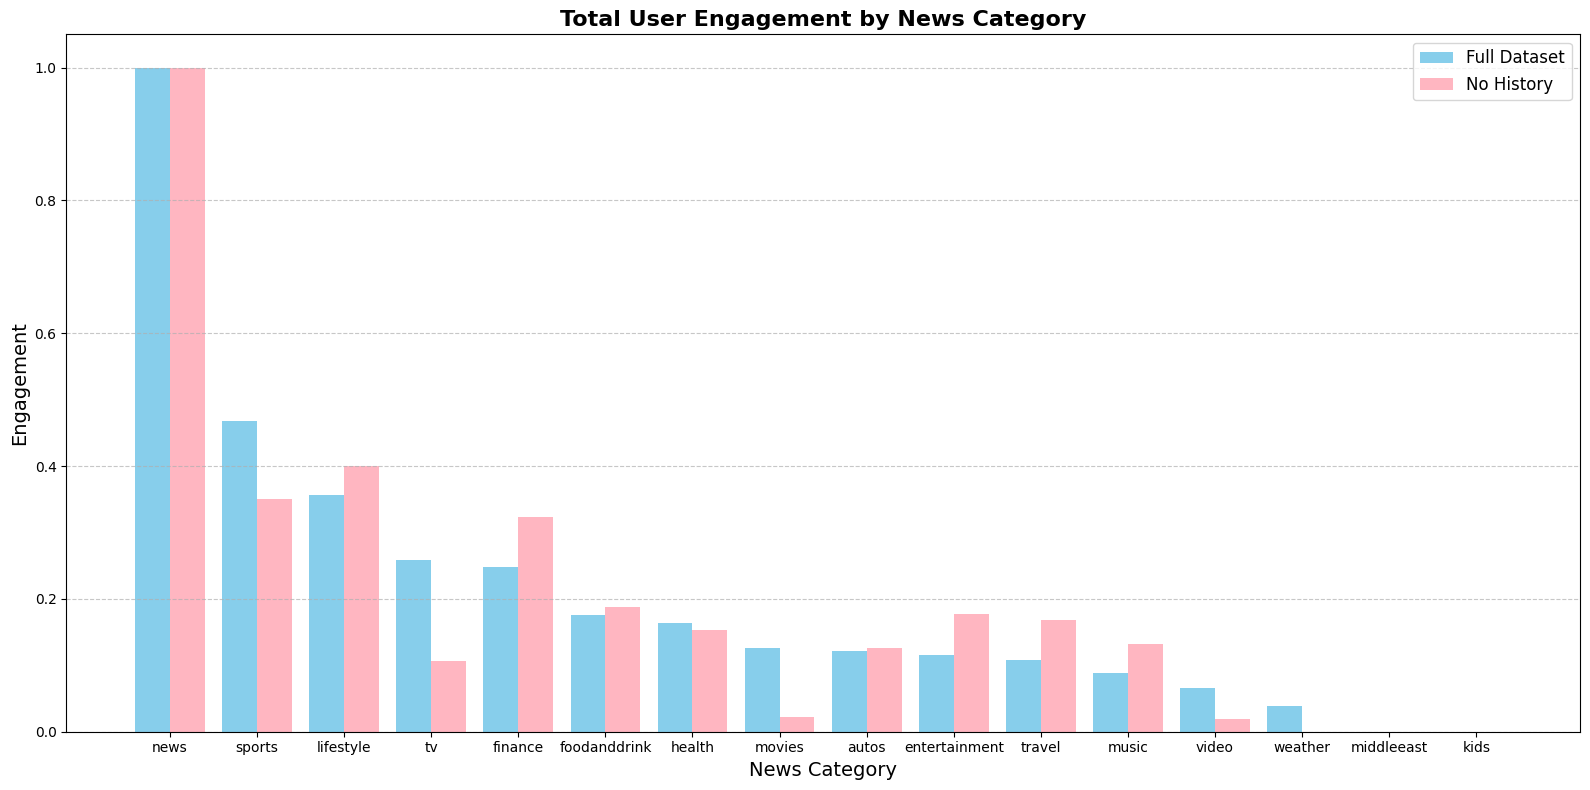

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a min-max scaler function for normalization
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

# Using merged_df
category_engagement_df = merged_df.groupby(['User ID', 'Category']).size().unstack(fill_value=0)
category_totals_df = category_engagement_df.sum().sort_values(ascending=False)
category_totals_df_scaled = min_max_scale(category_totals_df)

# Using merged_null_df
category_engagement_null_df = merged_null_df.groupby(['User ID', 'Category_y']).size().unstack(fill_value=0)
category_totals_null_df = category_engagement_null_df.sum().sort_values(ascending=False)
category_totals_null_df_scaled = min_max_scale(category_totals_null_df)


combined_categories = category_totals_df_scaled.index.union(category_totals_null_df_scaled.index)
category_totals_df_scaled = category_totals_df_scaled.reindex(combined_categories, fill_value=0)
category_totals_null_df_scaled = category_totals_null_df_scaled.reindex(combined_categories, fill_value=0)

# Combine and sort by descending engagement
combined_data = pd.DataFrame({
    'Full Dataset': category_totals_df_scaled,
    'No History': category_totals_null_df_scaled
}).sort_values(by='Full Dataset', ascending=False)


x = np.arange(len(combined_data.index))  # X positions for the bars
category_totals_df_scaled_sorted = combined_data['Full Dataset']
category_totals_null_df_scaled_sorted = combined_data['No History']
sorted_categories = combined_data.index


plt.figure(figsize=(16, 8))

bar_width = 0.4

# Plot full dataset
plt.bar(x - bar_width/2, category_totals_df_scaled_sorted, width=bar_width, color='skyblue', label='Full Dataset')

# Plot no history dataset
plt.bar(x + bar_width/2, category_totals_null_df_scaled_sorted, width=bar_width, color='lightpink', label='No History')

plt.title('Total User Engagement by News Category', fontsize=16, weight='bold')
plt.xlabel('News Category', fontsize=14)
plt.ylabel('Engagement', fontsize=14)  # Simplified Y-axis label
plt.xticks(ticks=x, labels=sorted_categories, rotation=0, ha='center', fontsize=10)
plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The standardized category totals for merged_df and merged_null_df highlight similar patterns in user engagement with news categories, but there are notable differences in category preferences between the two datasets. For both, the “news” category dominates engagement, standardized at 1.000, indicating it receives the highest user interactions by a significant margin.

In merged_df, “sports” (0.467) and “lifestyle” (0.356) are the next most popular categories, while categories like “middleeast” (0.000029) and “kids” (0.000) receive minimal engagement. This suggests that users in merged_df primarily focus on general news and high-interest topics like sports and lifestyle.

In contrast, merged_null_df also shows “news” as the leading category, but “lifestyle” (0.400) takes the second spot, with “sports” (0.350) close behind. Categories such as “weather” (0.000) and “movies” (0.023) see much lower engagement. This difference in ranking implies that users in merged_null_df may have slightly different content preferences, with a greater focus on lifestyle-related topics.

Overall, the standardized values help highlight the dominance of news across both datasets while showcasing subtle differences in how users interact with secondary categories, potentially reflecting variations in user demographics or behavior.

## Exploring Reading Patterns Over Time

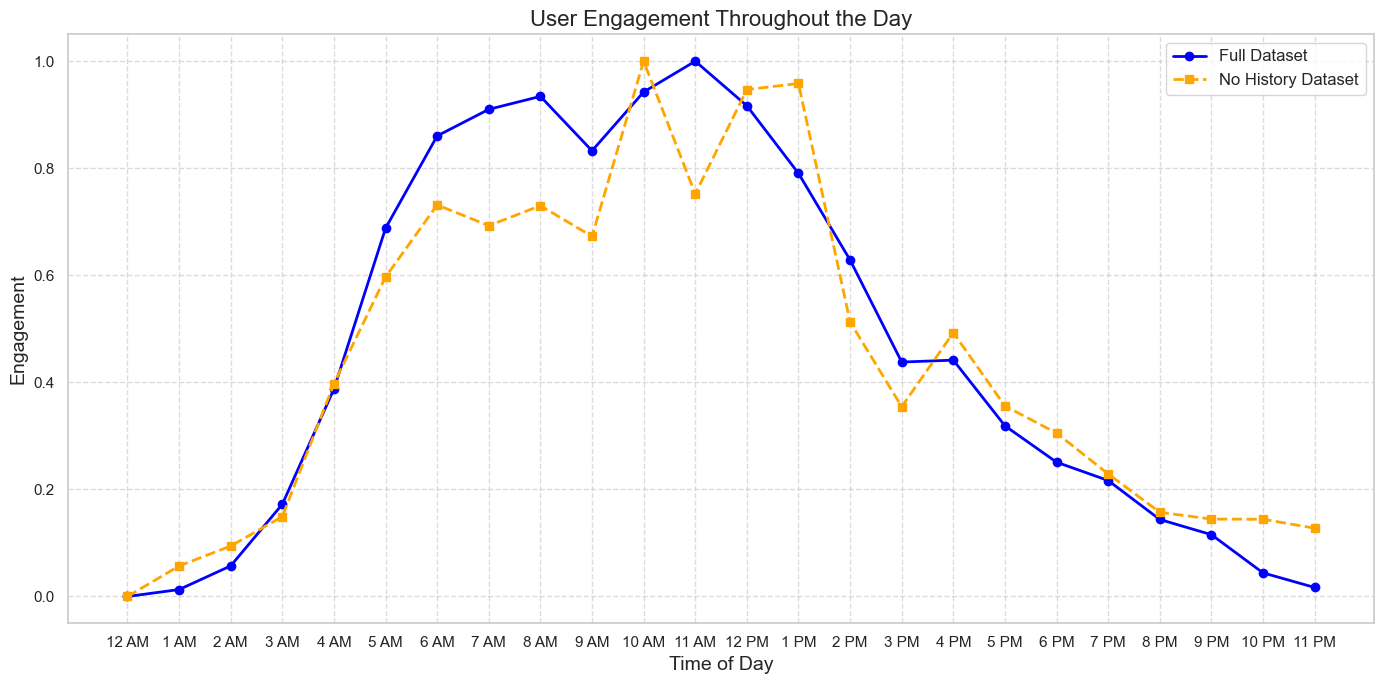

In [42]:
import matplotlib.pyplot as plt

# Define a min-max scaler function for standardization
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

# For merged_df
merged_df['Time'] = pd.to_datetime(merged_df['Time'])
merged_df['Hour'] = merged_df['Time'].dt.hour
hourly_engagement_df = merged_df.groupby('Hour').size()
hourly_engagement_df_scaled = min_max_scale(hourly_engagement_df)

# For merged_null_df
merged_null_df['Time'] = pd.to_datetime(merged_null_df['Time'])
merged_null_df['Hour'] = merged_null_df['Time'].dt.hour
hourly_engagement_null_df = merged_null_df.groupby('Hour').size()
hourly_engagement_null_df_scaled = min_max_scale(hourly_engagement_null_df)

# Define a function to convert hour integers to time labels
def hour_to_label(hour):
    return f"{hour % 12 or 12} {'AM' if hour < 12 else 'PM'}"

# Generate time labels for the x-axis
time_labels = [hour_to_label(hour) for hour in range(24)]

# Plot both scaled engagement trends
plt.figure(figsize=(14, 7))
hourly_engagement_df_scaled.plot(
    kind='line', marker='o', linestyle='-', color='blue', label='Full Dataset', linewidth=2
)
hourly_engagement_null_df_scaled.plot(
    kind='line', marker='s', linestyle='--', color='orange', label='No History Dataset', linewidth=2
)

plt.xticks(ticks=range(24), labels=time_labels, rotation=0)

plt.title('User Engagement Throughout the Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Engagement', fontsize=14)  # Removed "Standardized"

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

The data shows that user engagement for both datasets peaks during the late morning and midday hours, with the highest interaction around 11 AM. Engagement begins to rise early in the morning, starting around 4 AM, and gradually increases until it peaks. After midday, there is a steady decline in engagement, with the lowest activity occurring late at night between 11 PM and 2 AM. While the overall trend is similar for both datasets, engagement levels in merged_null_df are slightly lower than in merged_df, especially during peak hours. This suggests that users are most active during typical daytime hours, reflecting common daily routines, and engagement tapers off as the day progresses into the evening.

# **Low History Threshold**

## Calculate the unique history counts (number of unique News_IDs) per User ID 

In [11]:
user_history_counts = merged_df.groupby('User ID')['News_ID'].nunique().reset_index()
user_history_counts.columns = ['User_ID', 'History_Count']

# Display the resulting dataframe
print(user_history_counts.head())

  User_ID  History_Count
0    U100             10
1   U1000              3
2  U10001             15
3  U10003              8
4  U10008             23


## Create a histogram of History_Count

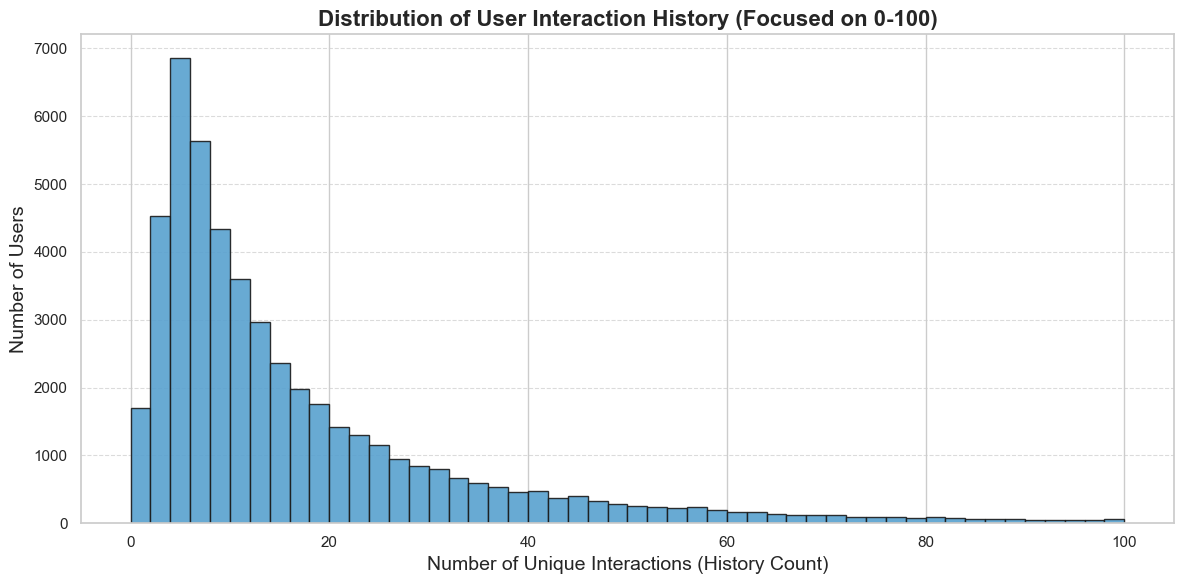

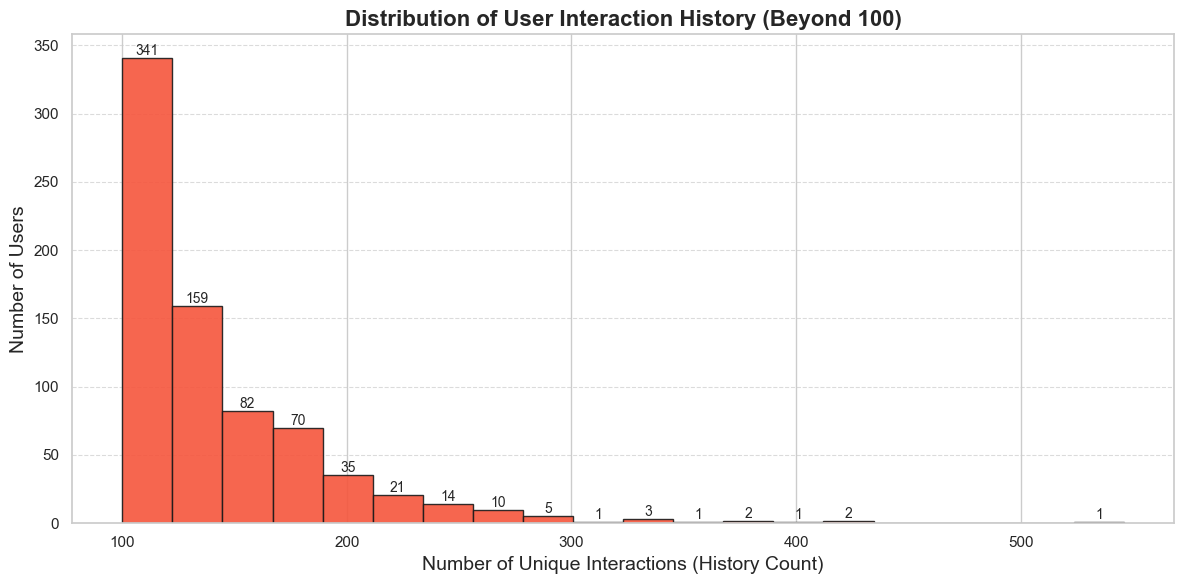

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns  # For aesthetic styles

# Set a clean style with Seaborn
sns.set_theme(style="whitegrid")

# Create the histogram
plt.figure(figsize=(12, 6))
counts, bins, bars = plt.hist(
    user_history_counts['History_Count'], 
    bins=50,  # Increased bins for better granularity within the 0-100 range
    range=(0, 100),  # Focus on the 0-100 range
    edgecolor='k', 
    color=sns.color_palette("Blues", 8)[4],  # A clean blue color
    alpha=0.9
)

# Add titles and labels
plt.title("Distribution of User Interaction History (Focused on 0-100)", fontsize=16, weight='bold')
plt.xlabel("Number of Unique Interactions (History Count)", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)

# Annotate the bar heights
#for count, bar in zip(counts, bars):
    #height = bar.get_height()
    #if height > 0:  # Only annotate bars with a significant count
        #plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.8)

# Tighten layout and show the plot
plt.tight_layout()
plt.show()

# Acknowledge less significant interactions beyond 100
plt.figure(figsize=(12, 6))
counts, bins, bars = plt.hist(
    user_history_counts['History_Count'], 
    bins=20,  # Default binning for broader view
    range=(100, user_history_counts['History_Count'].max()),  # Focus on the 100+ range
    edgecolor='k', 
    color=sns.color_palette("Reds", 8)[4],  # A clean red color
    alpha=0.9
)

# Add titles and labels
plt.title("Distribution of User Interaction History (Beyond 100)", fontsize=16, weight='bold')
plt.xlabel("Number of Unique Interactions (History Count)", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)

# Annotate the bar heights
for count, bar in zip(counts, bars):
    height = bar.get_height()
    if height > 0:  # Only annotate bars with a significant count
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.8)

# Tighten layout and show the plot
plt.tight_layout()
plt.show()

## CTR for each user

In [38]:
# Function to count clicked items (-1)
def count_clicks(impressions):
    return sum(1 for item in impressions.split() if item.endswith('-1'))

# Function to count total impressions
def count_total_impressions(impressions):
    return len(impressions.split())

# Apply to calculate `Click` and `Total_Impressions`
merged_df['Click'] = merged_df['Impressions'].apply(count_clicks)
merged_df['Total_Impressions'] = merged_df['Impressions'].apply(count_total_impressions)

# Verify counts
print(merged_df[['Impressions', 'Click', 'Total_Impressions']].head())

# Group by User ID to calculate CTR
user_ctr = merged_df.groupby('User ID').apply(
    lambda x: x['Click'].sum() / x['Total_Impressions'].sum() if x['Total_Impressions'].sum() > 0 else 0
).reset_index()
user_ctr.columns = ['User_ID', 'CTR']

# print(merged_df[['Impressions', 'Click', 'Total_Impressions']].head())
print(user_ctr.head())


         Impressions  Click  Total_Impressions
0  N55689-1 N35729-0      1                  2
1  N55689-1 N35729-0      1                  2
2  N55689-1 N35729-0      1                  2
3  N55689-1 N35729-0      1                  2
4  N55689-1 N35729-0      1                  2
  User_ID       CTR
0    U100  0.009524
1   U1000  0.021739
2  U10001  0.026316
3  U10003  0.010101
4  U10008  0.013889


/var/folders/6j/3xbqy_ss7d12n5z58vw1xq2r0000gn/T/ipykernel_21650/1661226751.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_ctr = merged_df.groupby('User ID').apply(


## Scatter plot of History Count vs. CTR

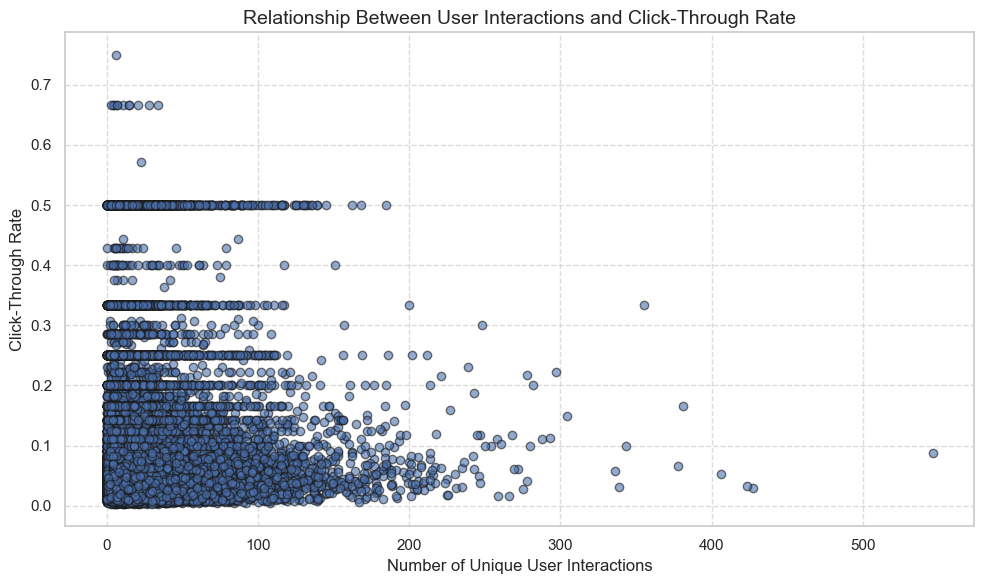

In [ ]:
import matplotlib.pyplot as plt

user_data = pd.merge(user_history_counts, user_ctr, on='User_ID')

plt.figure(figsize=(10, 6))
plt.scatter(user_data['History_Count'], user_data['CTR'], alpha=0.6, edgecolors='k')
plt.title("Relationship Between User Interactions and Click-Through Rate", fontsize=14)  
plt.xlabel("Number of Unique User Interactions", fontsize=12)  
plt.ylabel("Click-Through Rate", fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

## History & Impression Counts

In [40]:
# Calculate Total History Counts (unique News_IDs) per User
user_history_counts = merged_df.groupby('User ID')['News_ID'].nunique().reset_index()
user_history_counts.columns = ['User_ID', 'Total_History_Count']
print("Total History Counts per User:")
print(user_history_counts.head())

# Calculate Total Impression Counts per User
user_impressions = merged_df.groupby('User ID')['Impressions'].apply(lambda x: sum(len(i.split()) for i in x)).reset_index()
user_impressions.columns = ['User_ID', 'Total_Impression_Count']
print("\nTotal Impression Counts per User:")
print(user_impressions.head())


Total History Counts per User:
  User_ID  Total_History_Count
0    U100                   10
1   U1000                    3
2  U10001                   15
3  U10003                    8
4  U10008                   23

Total Impression Counts per User:
  User_ID  Total_Impression_Count
0    U100                    1050
1   U1000                     276
2  U10001                    1140
3  U10003                     792
4  U10008                    1656


## Heatmap

/var/folders/6j/3xbqy_ss7d12n5z58vw1xq2r0000gn/T/ipykernel_21650/546528479.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = user_data.groupby(['History_Bin', 'Impressions_Bin'])['CTR'].mean().unstack()


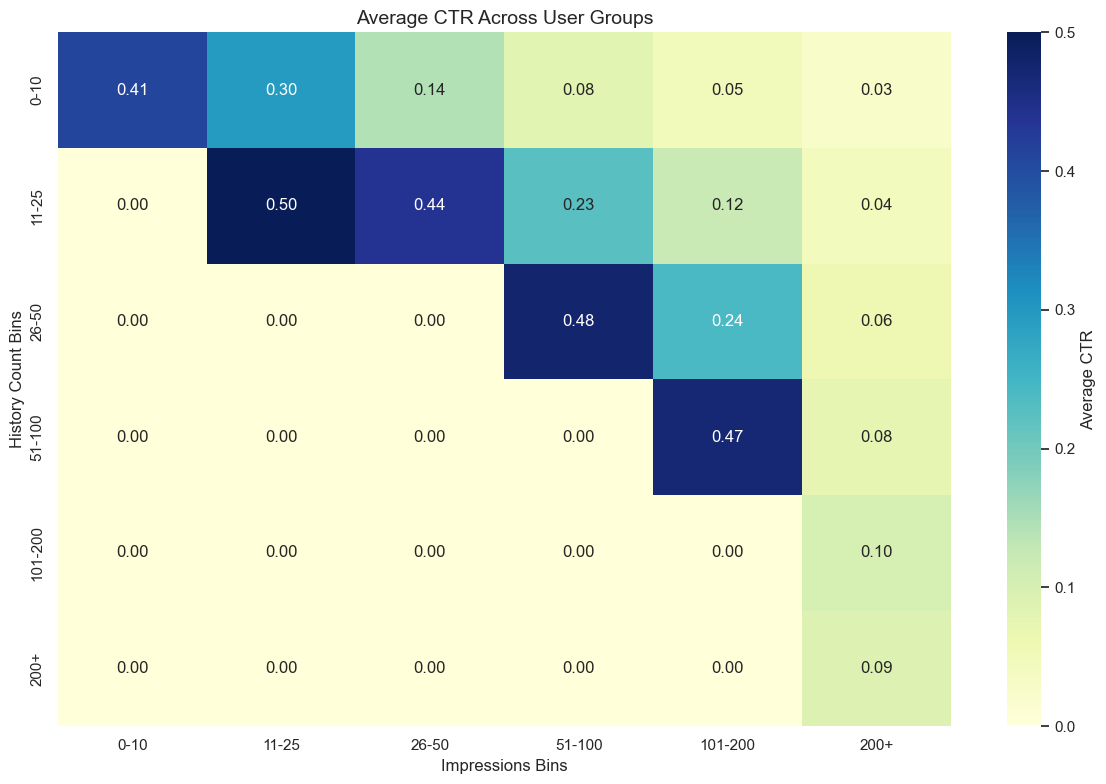

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define Bins for History Count and Impressions
history_bins = [0, 10, 25, 50, 100, 200, user_history_counts['Total_History_Count'].max()]
history_labels = ['0-10', '11-25', '26-50', '51-100', '101-200', '200+']
user_history_counts['History_Bin'] = pd.cut(user_history_counts['Total_History_Count'], bins=history_bins, labels=history_labels, include_lowest=True)

impression_bins = [0, 10, 25, 50, 100, 200, user_impressions['Total_Impression_Count'].max()]
impression_labels = ['0-10', '11-25', '26-50', '51-100', '101-200', '200+']
user_impressions['Impressions_Bin'] = pd.cut(user_impressions['Total_Impression_Count'], bins=impression_bins, labels=impression_labels, include_lowest=True)

# Step 2: Merge the DataFrames
user_data = pd.merge(user_history_counts, user_impressions, on='User_ID')
user_data = pd.merge(user_data, user_ctr, on='User_ID')

# Step 3: Create the Heatmap Data
heatmap_data = user_data.groupby(['History_Bin', 'Impressions_Bin'])['CTR'].mean().unstack()
heatmap_data = heatmap_data.fillna(0) 

# Step 4: Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Average CTR'})
plt.title("Average CTR Across User Groups", fontsize=14)  
plt.xlabel("Impressions Bins", fontsize=12)
plt.ylabel("History Count Bins", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout() 
plt.show()

In [131]:
print(heatmap_data)

Impressions_Bin     0-10     11-25     26-50    51-100   101-200      200+
History_Bin                                                               
0-5              0.41137  0.190266  0.098287  0.057500  0.036377  0.020380
6-10             0.00000  0.448461  0.218280  0.116507  0.064081  0.029633
11-20            0.00000  0.500000  0.426710  0.214655  0.114812  0.040749
21-50            0.00000  0.000000  0.500000  0.418422  0.214079  0.056447
51-100           0.00000  0.000000  0.000000  0.000000  0.469136  0.075135
100+             0.00000  0.000000  0.000000  0.000000  0.000000  0.099313
